In [1]:
import torch 
import os
from IPython.display import Image, clear_output

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.11.0+cpu (CPU)


In [2]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

In [3]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook = "ultralytics")


upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [4]:
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [6]:
## !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Nq1hoE2bQu9z5umv49JT")
project = rf.workspace().project("faces400")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/faces400-1 in yolov5pytorch:: 100%|█| 812/812 [00:00<00:00, 2570.97


In [7]:
!python train.py --img 416 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

finished initializing all
start training...
finished initializing all
finished initializing all
finished initializing all
finished initializing all
finished initializing all
finished initializing all
finished initializing all
finished initializing all
finished initializing all
finished initializing all
finished initializing all
finished initializing all
finished initializing all
finished initializing all
finished initializing all
finished initializing all
finished initializing all
finished initializing all
finished initializing all
finished initializing all
finished initializing all
finished initializing all
finished initializing all
finished initializing all


train: weights=yolov5s.pt, cfg=, data=C:\content\datasets\faces400-1/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v6.1-259-ga2a1ed2 Python-3.9.6 torch-1.11.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=

In [10]:
%load_ext tensorboard 
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 19556), started 0:00:37 ago. (Use '!kill 19556' to kill it.)

In [11]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=C:\content\datasets\faces400-1/test/images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.1-259-ga2a1ed2 Python-3.9.6 torch-1.11.0+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7020913 parameters, 0 gradients
image 1/40 C:\content\datasets\faces400-1\test\images\049f816e-William_Rehnquist_0002_jpg.rf.7bafedabbba90e9ee50c2a84ac200c7f.jpg: 416x416 2 eyes, 1 face, 1 mouth, 2 noses, Done. (0.156s)
image 2/40 C:\content\datasets\faces400-1\test\images\104411ad-Glafcos_Clerides_0004_jpg.rf.70f7462700b878bd48121ebe5c247661.jpg: 416x416 3 eyes, 3 faces, 3 mouths, 3 noses, Done. (0.125s)
im

In [17]:
#display inference on ALL test images
import glob
from IPython.display import Image, display

for imageName in glob.glob('/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [16]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source suzy.png

detect: weights=['runs/train/exp/weights/best.pt'], source=suzy.png, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.1-259-ga2a1ed2 Python-3.9.6 torch-1.11.0+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7020913 parameters, 0 gradients
image 1/1 C:\YOLO2022\face2minion\yolov5\suzy.png: 416x320 2 eyes, 1 face, 1 mouth, 1 nose, Done. (0.084s)
Speed: 0.0ms pre-process, 84.1ms inference, 0.0ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs\detect\exp2


In [25]:
# import cv2
# img = cv2.imread('C:\YOLO2022\face2minion\yolov5\runs\detect\exp2\suzy.png',0)
# window_name = 'image'

# cv2.imshow(window_name,img)
# cv2.waitKey(0)

In [30]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source suzy2.png

detect: weights=['runs/train/exp/weights/best.pt'], source=suzy2.png, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.1-259-ga2a1ed2 Python-3.9.6 torch-1.11.0+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7020913 parameters, 0 gradients
image 1/1 C:\YOLO2022\face2minion\yolov5\suzy2.png: 384x416 2 eyes, 1 face, 1 mouth, 1 nose, Done. (0.096s)
Speed: 0.0ms pre-process, 95.7ms inference, 0.0ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs\detect\exp5


In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
from PIL import Image


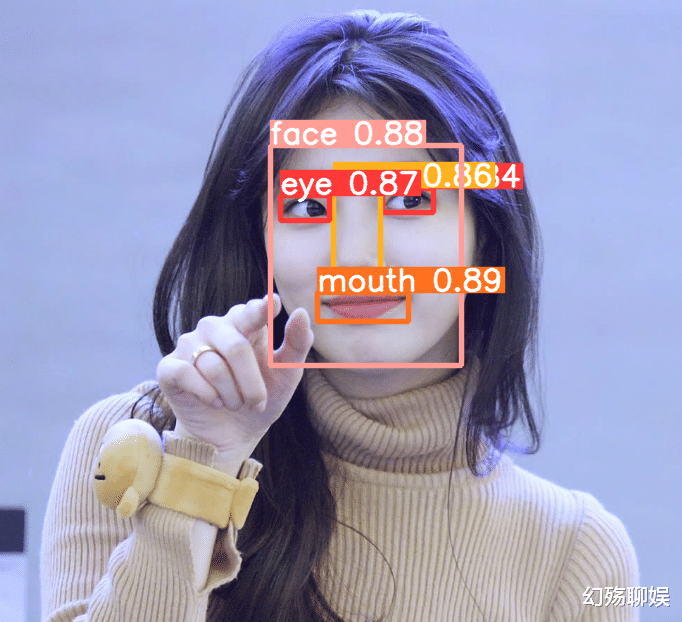

In [40]:
img = Image.open("runs/detect/exp5/suzy2.png")
img